<a href="https://colab.research.google.com/github/seoyun2/exploration/blob/main/Exploration4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration 4 : 작사가 인공지능 만들기 

__"문장"__의 사전정의 
> 생각이나 감정을 말과 글로 표현할 때 완결된 내용을 나타내는 최소 단위 

많은 인공지능들이 이미 놀라운 수준의 작문을 하고 있음 
* [GPT-2](https://talktotransformer.com/)

GPT-2 이전에도 작문을 할 수 있는 딥러닝 모델은 존재했지만, 생성한 문장 길이가 일정 이상이 되면 주제의 일관성이 흐트러지면서 어색함이 드러나곤 함.

그러나 GPT-2는 무려 신문기사 1편 정도의 길이의 글을 작문하면서 주제나 논리의 일관성을 어느 정도 유지했다는 점에서 놀라움을 줌

2019년 2월, GPT-2를 발표한 OpenAI에서 문장 생성 모델의 오남용이 가져올 위험 때문에 해당 모델을 비공개하기로 하면서 위와 같은 기사들이 한동안 세간의 이슈가 됨

그로부터 1년여 후 2020년 5월에 OpenAI에서는 다시 GPT-2를 이전보다 훨씬 큰 규모로 발전시킨 GPT-3를 발표하고 GPT-3가 만들어낸 텍스트는 그저 논리적 일관성을 유지하는 수준을 넘어서서 사람이 쓴 것과 구분이 안될 정도의 자연스러움을 보여줌


## 시퀀스(Sequence)
[파이썬 프로그래밍 입문서 (가제) - 5.2. 시퀀스](https://python.bakyeono.net/chapter-5-2.html)

__시퀀스란?__

> 데이터를 순서대로 하나씩 나열하여 나타낸 데이터 구조
>
> 특정 위치(~번째)의 데이터를 가리킬 수 있다.

* 나열과 정렬은 다름

  : 시퀀스 속의 데이터에 어떤 정렬 규칙이 반드시 있어야 하는 것은 아님.
  시퀀스에 담은 데이터의 순서란 데이터의 나열 순서일 뿐, 순서가 있다는 것과 정렬되었다는 것은 의미가 다르다
* 파이썬은 리스트(list), 튜플(tuple), 레인지(range), 문자열(string) 등이 여러 가지 시퀀스 컬렉션을 제공
* 시퀀스 데이터가 각 요소들의 연관성을 의미하는 것은 아니지만 인공지능이 예측을 하려면 __어느 정도의 연관성은 있어야함__


## 문법, 통계에 기반한 방법
인공지능이 글을 이해하는 방법은 어떤 문법적인 원리를 통해서가 아니고, __수많은 글을 읽게 함으로써__ `나는`, `밥을`, 그다음이 `먹는다`라는 사실을 알게 하는 것

이런 이유로 __많은 데이터가 곧 좋은 결과__를 만들어 냄

이 방식을 가장 잘 처리하는 인공지능 중 하나가 __순환신경망(RNN)__

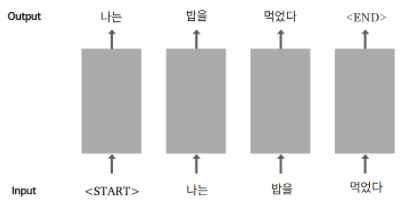

`나는`을 만드는 방법은 `<start>`라는 특수한 토큰을 맨 앞에 추가해 인공지능에게 "자, 이제 어던 문장이든 생성해봐!"라는 사인을 주는 셈

`<start>`를 입력으로 받은 순환신경망은 다음 단어로 `나는`을 생성하고, __생성한 단어를 다시 입력으로 사용__. 이 순환적인 특성을 살려 순환신경망이라고 부름

그렇게 순차적으로 밥을 먹었다 까지 생성하고 나면, 인공지능은 "다 만들었어!" 라는 사인으로 `<end>` 라는 특수한 토큰을 생성. 즉, 우리는 `<start>` 가 문장의 시작에 더해진 입력 데이터(문제지)와, `<end>` 가 문장의 끝에 더해진 출력 데이터(답안지)가 필요하며, 이는 문장 데이터만 있으면 만들어낼 수 있다는 것 또한 알 수 있음.

In [ ]:
sentence = " 나는 밥을 먹었다 "

source_sentence = "<start>" + sentence
target_sentence = sentence + "<end>"

print("Source 문장:", source_sentence)
print("Target 문장:", target_sentence)

Source 문장: <start> 나는 밥을 먹었다 
Target 문장:  나는 밥을 먹었다 <end>


__언어 모델(Language Model)__

`나는`, `밥을`, `먹었다`를 순차적으로 생성할 때, `밥을` 다음이 `먹었다` 인 것은 쉽게 알 수 있지만 `나는` 다음이 `밥을` 인 것은 순전히 운! 

이것을 확률적으로 표현하면 

`'나는 밥을'` 다음에 `'먹었다'`가 올 확률 = $p(먹었다|나는,밥을)$ 

$p(먹었다|나는,밥을)$ 는 `'나는'` 뒤에 `'밥이'`가 나올 확률인 $p(밥을|나는)$ 보다 높음. 아마도 $p(먹었다|나는, 밥을, 맛있게)$의 확률은 더 높아질 것

어떤 문구 뒤에 다음 단어가 나올 확률이 높다는 것은 그 단어가 나오는 것이 보다 자연스럽다는 뜻

하지만 그렇다고 '나는' 뒤에 '밥을'이 나오는 것이 자연스럽지 않다는 뜻은 아님. '나는' 뒤에 올 수 있는 자연스러운 단어의 경우의 수가 워낙 많다 보니 불확실성이 높을 뿐

$n−1$개의 단어 시퀀스 $w_1, \cdots, w_{n-1}$가 주어졌을 때 $n$번재 단어 $w_n$으로 무엇이 올지를 예측하는 확률 모델을 __언어 모델(Language Model)__이라고 부름 

$P(w_n | w_1, ..., w_{n-1};\theta )$



In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## 데이터 전처리

In [ ]:
import os, re 
import numpy as np
import tensorflow as tf

# 파일을 읽기모드로 열고
# 라인 단위로 끊어서 list 형태로 읽어옵니다.
file_path = '/content/gdrive/My Drive/aiffel/lyricist/data/shakespeare.txt'
with open(file_path, "r") as f:
    raw_corpus = f.read().splitlines()

# 앞에서부터 10라인만 화면에 출력해 볼까요?
print(raw_corpus[:9])

['First Citizen:', 'Before we proceed any further, hear me speak.', '', 'All:', 'Speak, speak.', '', 'First Citizen:', 'You are all resolved rather to die than to famish?', '']


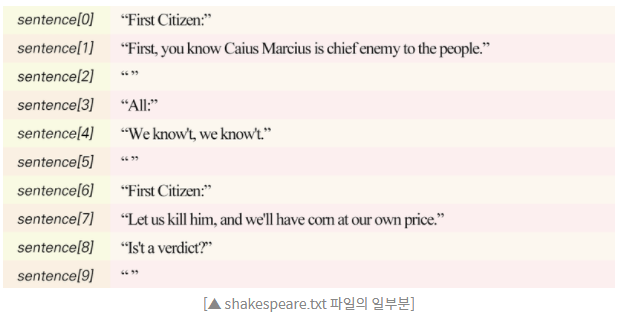

모든 문장을 하나하나 검사한다고 가정하면 우리가 원치 않는 문장은 화자가 표기된 문장(0, 3, 6), 그리고 공백인 문장(2, 5, 9) 

화자가 표기된 문장은 문장의 끝이 `:`로 끝나게 되어 있음.

일반적으로 대사가 `:` 로 끝나는 일은 없을테니, `:` 를 기준으로 문장을 제외

그리고 공백인 문장은 길이를 검사하여 길이가 0이라면 제외

In [ ]:
for idx, sentence in enumerate(raw_corpus):
    if len(sentence) == 0: continue   # 길이가 0인 문장은 건너뜁니다.
    if sentence[-1] == ":": continue  # 문장의 끝이 : 인 문장은 건너뜁니다.

    if idx > 9: break   # 일단 문장 10개만 확인해 볼 겁니다.
        
    print(sentence)

Before we proceed any further, hear me speak.
Speak, speak.
You are all resolved rather to die than to famish?


텍스트 분류 모델에서 많이 보신 것처럼 텍스트 생성 모델에도 단어 사전을 만들게 됨

문장을 일정한 기준으로 쪼개는 과정을 __토큰화(Tokenize)__라고 함 

가장 심플한 방법은 띄어쓰기를 기준으로 나누는 방법
1. Hi, my name is John. *("Hi," "my", ..., "john." 으로 분리됨) - 문장부호
> __해결방법 :__ 문장 부호 양쪽에 공백을 추가
2. First, open the first chapter. *(First와 first를 다른 단어로 인식) - 대소문자
>  __해결방법 :__모든 문자들을 소문자로 변환
3. He is a ten-year-old boy. *(ten-year-old를 한 단어로 인식) - 특수문자
> __해결방법 :__특수문자들은 모두 제거


In [ ]:
# 입력된 문장을
#     1. 소문자로 바꾸고, 양쪽 공백을 지웁니다
#     2. 특수문자 양쪽에 공백을 넣고
#     3. 여러개의 공백은 하나의 공백으로 바꿉니다
#     4. a-zA-Z?.!,¿가 아닌 모든 문자를 하나의 공백으로 바꿉니다
#     5. 다시 양쪽 공백을 지웁니다
#     6. 문장 시작에는 <start>, 끝에는 <end>를 추가합니다
# 이 순서로 처리해주면 문제가 되는 상황을 방지할 수 있겠네요!
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 1
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) # 2
    sentence = re.sub(r'[" "]+', " ", sentence) # 3
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4
    sentence = sentence.strip() # 5
    sentence = '<start> ' + sentence + ' <end>' # 6
    return sentence

# 이 문장이 어떻게 필터링되는지 확인해 보세요.
print(preprocess_sentence("This @_is ;;;sample        sentence."))

<start> this is sample sentence . <end>


자연어처리 분야에서 모델의 입력이 되는 문장을 소스 문장(Source Sentence) , 정답 역할을 하게 될 모델의 출력 문장을 타겟 문장(Target Sentence) 라고 관례적으로 부름

각각 X_train, y_train 에 해당

위에서 만든 정제 함수를 통해 만든 데이터셋에서 토큰화를 진행한 후 끝 단어 `<end>`를 없애면 소스 문장, 첫 단어 `<start>`를 없애면 타겟 문장

In [ ]:
# 여기에 정제된 문장을 모을겁니다
corpus = []

for sentence in raw_corpus:
    # 우리가 원하지 않는 문장은 건너뜁니다
    if len(sentence) == 0: continue
    if sentence[-1] == ":": continue
    
    # 정제를 하고 담아주세요
    preprocessed_sentence = preprocess_sentence(sentence)
    corpus.append(preprocessed_sentence)
        
# 정제된 결과를 10개만 확인해보죠
corpus[:10]

['<start> before we proceed any further , hear me speak . <end>',
 '<start> speak , speak . <end>',
 '<start> you are all resolved rather to die than to famish ? <end>',
 '<start> resolved . resolved . <end>',
 '<start> first , you know caius marcius is chief enemy to the people . <end>',
 '<start> we know t , we know t . <end>',
 '<start> let us kill him , and we ll have corn at our own price . <end>',
 '<start> is t a verdict ? <end>',
 '<start> no more talking on t let it be done away , away ! <end>',
 '<start> one word , good citizens . <end>']

영어를 전혀 모르던 때로 돌아가서 상상을 해보면 __영한사전__ 을 허리춤에 끼고 문장 속 단어를 하나하나 찾아가며 __한국어 해석__ 을 적음

__배우고자 하는 언어__ 를 __모국어__로 표현하는 것은 인공지능에게도 똑같이 적용됨

인공지능의 모국어는 __숫자__

텐서플로우는 자연어 처리를 위한 여러 가지 모듈을 제공함

아래에서 활용하게 될 `tf.keras.preprocessing.text.Tokenizer` 패키지는 정제된 데이터를 토큰화하고, 단어 사전(vocabulary 또는 dictionary라고 칭함)을 만들어주며, 데이터를 숫자로 변환까지 해결할 수 있음

이 과정을 __벡터화(vectorize)__ 라 하며, 숫자로 변환된 데이터를 __텐서(tensor)__ 라고 칭함

> 텐서(tensor)는 굉장히 어려운 물리학 및 수학 개념 [Tensor란 무엇인가?](https://rekt77.tistory.com/102)

In [ ]:
# 토큰화 할 때 텐서플로우의 Tokenizer와 pad_sequences를 사용합니다
# 더 잘 알기 위해 아래 문서들을 참고하면 좋습니다
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
def tokenize(corpus):
    # 7000단어를 기억할 수 있는 tokenizer를 만들겁니다
    # 우리는 이미 문장을 정제했으니 filters가 필요없어요
    # 7000단어에 포함되지 못한 단어는 '<unk>'로 바꿀거에요
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=7000, 
        filters=' ',
        oov_token="<unk>"
    )
    # corpus를 이용해 tokenizer 내부의 단어장을 완성합니다
    tokenizer.fit_on_texts(corpus)
    # 준비한 tokenizer를 이용해 corpus를 Tensor로 변환합니다
    tensor = tokenizer.texts_to_sequences(corpus)   
    # 입력 데이터의 시퀀스 길이를 일정하게 맞춰줍니다
    # 만약 시퀀스가 짧다면 문장 뒤에 패딩을 붙여 길이를 맞춰줍니다.
    # 문장 앞에 패딩을 붙여 길이를 맞추고 싶다면 padding='pre'를 사용합니다
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')  
    
    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)

[[   2  143   40 ...    0    0    0]
 [   2  110    4 ...    0    0    0]
 [   2   11   50 ...    0    0    0]
 ...
 [   2  149 4553 ...    0    0    0]
 [   2   34   71 ...    0    0    0]
 [   2  945   34 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f2dc2399950>


생성된 텐서 데이터를 3번째 행, 10번째 열까지만 출력

In [ ]:
print(tensor[:3, :10])

[[   2  143   40  933  140  591    4  124   24  110]
 [   2  110    4  110    5    3    0    0    0    0]
 [   2   11   50   43 1201  316    9  201   74    9]]


텐서 데이터는 모두 정수로 이루어져 있음

이 숫자는 tokenizer에 구축된 단어 사전의 인덱스

In [ ]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 10: break

1 : <unk>
2 : <start>
3 : <end>
4 : ,
5 : .
6 : the
7 : and
8 : i
9 : to
10 : of


In [ ]:
# tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다
# 마지막 토큰은 <end>가 아니라 <pad>일 가능성이 높습니다.
src_input = tensor[:, :-1]  
# tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다.
tgt_input = tensor[:, 1:]    

print(src_input[0])
print(tgt_input[0])

[  2 143  40 933 140 591   4 124  24 110   5   3   0   0   0   0   0   0
   0   0]
[143  40 933 140 591   4 124  24 110   5   3   0   0   0   0   0   0   0
   0   0]


corpus 내의 첫 번째 문장에 대해 생성된 소스와 타겟 문장을 확인해 봄

예상대로 소스는 2(`<start>`)에서 시작해서 3(`<end>`)으로 끝난 후 0(<pad>)로 채워져 있음 

하지만 타겟은 2로 시작하지 않고 소스를 왼쪽으로 한 칸 시프트 한 형태를 가지고 있음

마지막으로 우리는 데이터셋 객체를 생성할 것입

그동안 우리는 model.fit(x_train, y_train, ...) 형태로 Numpy Array 데이터셋을 생성하여 model에 제공하는 형태의 학습을 많이 진행해 왔지만 텐서플로우를 활용할 경우 텐서로 생성된 데이터를 이용해 `tf.data.Dataset`객체를 생성하는 방법을 흔히 사용함

`tf.data.Dataset`객체는 텐서플로우에서 사용할 경우 데이터 입력 파이프라인을 통한 속도 개선 및 각종 편의 기능을 제공하므로 꼭 사용법을 알아 두시기를 권장 

우리는 이미 데이터셋을 텐서 형태로 생성해 두었으므로, `tf.data.Dataset.from_tensor_slices()` 메소드를 이용해 `tf.data.Dataset`객체를 생성

In [ ]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

 # tokenizer가 구축한 단어사전 내 7000개와, 여기 포함되지 않은 0:<pad>를 포함하여 7001개
VOCAB_SIZE = tokenizer.num_words + 1   

# 준비한 데이터 소스로부터 데이터셋을 만듭니다
# 데이터셋에 대해서는 아래 문서를 참고하세요
# 자세히 알아둘수록 도움이 많이 되는 중요한 문서입니다
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset shapes: ((256, 20), (256, 20)), types: (tf.int32, tf.int32)>

이번 스텝에서 데이터셋을 생성하기 위해 거쳐 온 과정을 잘 기억하기

* 정규표현식을 이용한 `corpus` 생성
* `tf.keras.preprocessing.text.Tokenizer`를 이용해 `corpus`를 텐서로 변환
* `tf.data.Dataset.from_tensor_slices()`를 이용해 `corpus` 텐서를 `tf.data.Dataset`객체로 변환

`dataset`을 얻음으로써 데이터 다듬기 과정은 끝남

`tf.data.Dataset`에서 제공하는 `shuffle()`, `batch()` 등 다양한 데이터셋 관련 기능을 손쉽게 이용할 수 있음

이 모든 일련의 과정을 텐서플로우에서의 __데이터 전처리__ 라고 칭함

## 인공지능 학습시키기

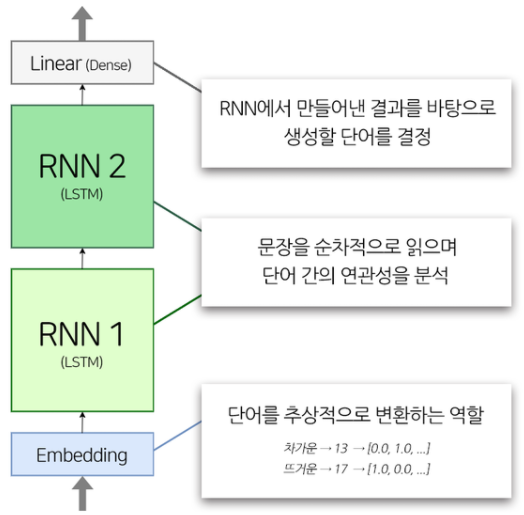


모델은 tf.keras.Model을 Subclassing하는 방식으로 만들 것

위 그림의 설명처럼 만들 모델은 1개의 `Embedding Layer`, 2개의 `LSTM Layer`, 1개의 `Dense Layer`로 구성되어 있음

`입력텐서`에는 단어 사전의 인덱스가 들어 있음 

`Embedding Layer`는 이 인덱스 값을 해당 인덱스 번째의 워드 벡터로 바꿔줌

이 워드 벡터는 의미 벡터 공간에서 단어의 추상적 표현(representation)으로 사용 

In [ ]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
    
embedding_size = 256
hidden_size = 1024
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

위 코드에서 `embedding_size` 는 워드 벡터의 차원수, 즉 단어가 추상적으로 표현되는 크기 

만약 그 크기가 2라면 예를 들어

* 차갑다: [0.0, 1.0]
* 뜨겁다: [1.0, 0.0]
* 미지근하다: [0.5, 0.5]

정도로 구분이 가능하고 값이 커질수록 단어의 추상적인 특징들을 더 잡아낼 수 있지만, 그만큼 충분한 데이터가 주어지지 않으면 __혼란을 야기__할 수 있음

이번실습에서는 256이 적당

LSTM 레이어의 hidden state 의 차원수인 `hidden_size` 도 같은 맥락

 `hidden_size` 는 모델에 얼마나 많은 일꾼을 둘 것인가? 로 이해해도 크게 엇나가지 않음. 그 일꾼들은 모두 같은 데이터를 보고 각자의 생각을 가지는데, 역시 충분한 데이터가 주어지면 올바른 결정을 내리겠지만 그렇지 않으면 __배가 산으로 갈 뿐__. 이번 실습에는 1024가 적당
 ***

만든 모델은 아직 제대로 build되지 않음

`model.compile()`을 호출하지도 않고, 아직 model의 입력 텐서가 무엇인지 지정하지도 않음

그런 경우 model에 데이터를 아주 조금 태워보는것도 방법

model의 input shape가 결정되면서 `model.build()`가 자동으로 호출됨

In [ ]:
# 데이터셋에서 데이터 한 배치만 불러오는 방법입니다.
# 지금은 동작 원리에 너무 빠져들지 마세요~
for src_sample, tgt_sample in dataset.take(1): break

# 한 배치만 불러온 데이터를 모델에 넣어봅니다
model(src_sample)

<tf.Tensor: shape=(256, 20, 7001), dtype=float32, numpy=
array([[[ 4.35132642e-05, -1.43014360e-04,  2.06735029e-04, ...,
          2.13921958e-04,  9.61283295e-05,  5.45355979e-05],
        [ 3.51689851e-05, -2.10605256e-04,  1.23084683e-04, ...,
          1.30285320e-04,  2.36935579e-04, -1.51702669e-04],
        [-1.76520189e-04,  7.20276803e-05,  7.54716530e-05, ...,
          3.16377409e-04, -2.01449006e-06, -3.52419680e-04],
        ...,
        [ 3.02294432e-03,  5.38038323e-03, -2.48804013e-03, ...,
          1.23432989e-03,  1.32921117e-03, -4.30636853e-03],
        [ 3.07928445e-03,  5.75162610e-03, -2.57162144e-03, ...,
          1.27845106e-03,  1.30624219e-03, -4.58185608e-03],
        [ 3.11925006e-03,  6.06081728e-03, -2.64798664e-03, ...,
          1.32149912e-03,  1.27629016e-03, -4.82127583e-03]],

       [[ 4.35132642e-05, -1.43014360e-04,  2.06735029e-04, ...,
          2.13921958e-04,  9.61283295e-05,  5.45355979e-05],
        [ 3.01798776e-04, -9.18064616e-05, -3.

모델의 최종 출력 텐서 shape를 유심히 보면 `shape=(256, 20, 7001`임을 알 수 있음. 

7001은 Dense 레이어의 출력 차원수 (7001개의 단어 중 어느 단어의 확률이 가장 높을지를 모델링해야 하기 때문에)

256은 이전 스텝에서 지정한 배치 사이즈(`dataset.take(1)`를 통해서 1개의 배치, 즉 256개의 문장 데이터를 가져온 것)

그렇다면 20의 의미는? 
> `tf.keras.layers.LSTM(hidden_size, return_sequences=True)`로 호출한 LSTM 레이어에서 `return_sequences=True`이라고 지정한 부분에 답이 있음. 
> 
> 즉, LSTM은 자신에게 입력된 시퀀스의 길이만큼 동일한 길이의 시퀀스를 출력한다는 의미. (만약 `return_sequences=False`였다면 LSTM 레이어는 1개의 벡터만 출력했을 것)

그런데 문제는, 우리의 모델은 입력 데이터의 시퀀스 길이가 얼마인지 모른다는 점임. 
> 모델을 만들면서 알려준 적도 없기 때문에 데이터를 입력받으면서 우리 데이터셋의 `max_len`이 20으로 맞춰져 있었음

In [ ]:
model.summary()

Model: "text_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  1792256   
_________________________________________________________________
lstm (LSTM)                  multiple                  5246976   
_________________________________________________________________
lstm_1 (LSTM)                multiple                  8392704   
_________________________________________________________________
dense (Dense)                multiple                  7176025   
Total params: 22,607,961
Trainable params: 22,607,961
Non-trainable params: 0
_________________________________________________________________


이제 드디어 model.summary()를 호출할 수 있게 됨.

그런데 호출해 보니 그동안 많이 보았던 것과는 다른 점이 있음. 우리가 궁금했던 Output Shape를 정확하게 알려주지 않음. 

우리의 모델은 입력 시퀀스의 길이를 모르기 때문에 Output Shape를 특정할 수 없는 것!

하지만 모델의 파라미터 사이즈는 측정 가능함. (대략 22million 정도). 참고로 서두에 소개했던 GPT-2의 파라미터 사이즈는, 1.5billion. 우리 모델의 수십배가 넘음. (GPT-3의 파라미터 사이즈는 PT-2의 100배)
***

모델 학습시키기 (너무 오랜시간이 걸리면 GPU를 사용하고 있는지 확인할 것)

In [ ]:
# optimizer와 loss등은 차차 배웁니다
# 혹시 미리 알고 싶다면 아래 문서를 참고하세요
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
# 양이 상당히 많은 편이니 지금 보는 것은 추천하지 않습니다
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

model.compile(loss=loss, optimizer=optimizer)
model.fit(dataset, epochs=30)

Epoch 1/30
93/93 [==============================] - 19s 175ms/step - loss: 3.6722
Epoch 2/30
93/93 [==============================] - 17s 178ms/step - loss: 2.8730
Epoch 3/30
93/93 [==============================] - 17s 182ms/step - loss: 2.7956
Epoch 4/30
93/93 [==============================] - 17s 183ms/step - loss: 2.7438
Epoch 5/30
93/93 [==============================] - 18s 188ms/step - loss: 2.6632
Epoch 6/30
93/93 [==============================] - 18s 192ms/step - loss: 2.6030
Epoch 7/30
93/93 [==============================] - 18s 196ms/step - loss: 2.5528
Epoch 8/30
93/93 [==============================] - 18s 195ms/step - loss: 2.5084
Epoch 9/30
93/93 [==============================] - 18s 193ms/step - loss: 2.4701
Epoch 10/30
93/93 [==============================] - 18s 191ms/step - loss: 2.4287
Epoch 11/30
93/93 [==============================] - 18s 194ms/step - loss: 2.3925
Epoch 12/30
93/93 [==============================] - 18s 195ms/step - loss: 2.3600
Epoch 13/30
9

Loss는 모델이 오답을 만들고 있는 정도라고 생각하셔도 좋음(그렇다고 Loss가 1일 때 99%를 맞추고 있다는 의미는 아님). 

오답률이 감소하고 있으니 __학습이 잘 진행되고 있다__ 고 해석할 수 있음

학습이 완료되었다면 이제 모델을 평가를 해야함

## 잘 만들어졌는지 평가하기
모델이 작문을 잘하는지 컴퓨터 알고리즘이 평가하는 것은 무리가 있음. (만약에 그게 가능했다면 우리가 지금껏 해온 독후감 숙제를 컴퓨터가 채점했겠지?) 

따라서 작문 모델을 평가하는 가장 확실한 방법은 작문을 시켜보고 직접 평가하는 것! 

아래 generate_text 함수는 모델에게 시작 문장을 전달하면 모델이 시작 문장을 바탕으로 작문을 진행함

In [ ]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    # 테스트를 위해서 입력받은 init_sentence도 텐서로 변환합니다
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    # 단어 하나씩 예측해 문장을 만듭니다
    #    1. 입력받은 문장의 텐서를 입력합니다
    #    2. 예측된 값 중 가장 높은 확률인 word index를 뽑아냅니다
    #    3. 2에서 예측된 word index를 문장 뒤에 붙입니다
    #    4. 모델이 <end>를 예측했거나, max_len에 도달했다면 문장 생성을 마칩니다
    while True:
        # 1
        predict = model(test_tensor) 
        # 2
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        # 3 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        # 4
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # tokenizer를 이용해 word index를 단어로 하나씩 변환합니다 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

텍스트를 생성하는 함수 안을 들여다보면 while문이 있는데 이유는?

학습 단계에서 우리는 이런 while 문이 필요 없었음. 소스 문장과 타겟 문장이 있었고, 우리는 소스 문장을 모델에 입력해서 나온 결과를 타겟 문장과 직접 비교하면 끝!

그러나 텍스트를 실제로 생성해야 하는 시점에서, 우리에게는 `타겟문장`과 `소스문장`이 없음. 생각해 보면 우리는 텍스트 생성 태스크를 위해 테스트 데이터셋을 따로 생성한 적이 없음.

`generate_text()` 함수에서 `init_sentence`를 인자로 받고이렇게 받은 인자를 일단 텐서로 만들고 있음. (디폴트로는 `<start>` 단어 하나만 받음)

* while의 첫 번째 루프에서 test_tensor에 `<start>` 하나만 들어갔다고 합시다. 우리의 모델이 출력으로 7001개의 단어 중 A를 골랐다고 합시다.
* while의 두 번째 루프에서 test_tensor에는 `<start>` A가 들어갑니다. 그래서 우리의 모델이 그다음 B를 골랐다고 합시다.
* while의 세 번째 루프에서 test_tensor에는 `<start>` A B가 들어갑니다. 그래서..... (이하 후략)

실제로 위 문장 생성함수를 실행하면

In [ ]:
generate_text(model, tokenizer, init_sentence="<start> he")

'<start> he s a <unk> , and the <unk> of the field , <end> '

문장을 생성해냄! 위 함수의 `init_sentence` 를 바꿔가며 이런저런 실험을 해보기. 단, `<start>`를 빼먹지는 않도록 주의할 것

# 프로젝트 : 멋진 작사가 만들기 

## STEP1. 데이터 다운로드
`~/aiffel/lyricist/data/lyrics`에 데이터 넣어 놓음

## STEP2. 데이터 읽어오기 
`glob` 모듈을 사용하면 파일을 읽어오는 작업을 하기가 아주 용이

`glob` 를 활용하여 모든 `txt` 파일을 읽어온 후, `raw_corpus` 리스트에 문장 단위로 저장

In [1]:
import glob, re, os

txt_file_path = '/content/drive/MyDrive/aiffel/lyricist/data/lyrics/*'

txt_list = glob.glob(txt_file_path)

raw_corpus = []

# 여러개의 txt 파일을 모두 읽어서 raw_corpus 에 담습니다.
for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

print("데이터 크기:", len(raw_corpus))
print("Examples:\n", raw_corpus[:3])

데이터 크기: 187088
Examples:
 ['Looking for some education', 'Made my way into the night', 'All that bullshit conversation']


## Step 3. 데이터 정제
앞서 배운 테크닉들을 활용해 문장 생성에 적합한 모양새로 데이터를 정제하기

`preprocess_sentence()` 함수를 활용해 데이터를 정제

추가로 지나치게 긴 문장은 다른 데이터들이 과도한 Padding을 갖게 하므로 제거

문장을 토큰화 했을 때 토큰의 개수가 15개를 넘어가는 문장을 학습 데이터에서 제외하기

In [2]:
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 1
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) # 2
    sentence = re.sub(r'[" "]+', " ", sentence) # 3
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4
    sentence = sentence.strip() # 5
    sentence = '<start> ' + sentence + ' <end>' # 6
    return sentence

# 이 문장이 어떻게 필터링되는지 확인해 보세요.
print(preprocess_sentence("This @_is ;;;sample        sentence."))

<start> this is sample sentence . <end>


문장 길이 0인것 제외, 문장 끝이 `:` 로 끝나는 문장을 제외하진 않음 (가사여서)

In [3]:
corpus = []
for sentence in raw_corpus:
  if len(sentence) == 0: continue
  if len(sentence.split(' ')) > 15: continue
  corpus.append(preprocess_sentence(sentence))

print(len(corpus))
corpus[:10]

168535


['<start> looking for some education <end>',
 '<start> made my way into the night <end>',
 '<start> all that bullshit conversation <end>',
 '<start> baby , can t you read the signs ? i won t bore you with the details , baby <end>',
 '<start> i don t even wanna waste your time <end>',
 '<start> let s just say that maybe <end>',
 '<start> you could help me ease my mind <end>',
 '<start> i ain t mr . right but if you re looking for fast love <end>',
 '<start> if that s love in your eyes <end>',
 '<start> it s more than enough <end>']

> 데이터의 수가 많다. 

In [4]:
corpus = []
for sentence in raw_corpus:
  if len(sentence) == 0: continue
  corpus.append(preprocess_sentence(sentence))
print(len(corpus))
corpus[:10]

len_corpus = []
for sentence in corpus:
  if len(sentence.split()) <= 15:
    len_corpus.append(sentence)
  
print(len(len_corpus))

175986
156227


여기서 토큰이 15개 이상인 문장을 날리고 싶어 `if len(sentence.split(' ')) > 15: continue` 을 사용했으나 생각보다 데이터의 수가 많아서 1차로 `corpus`에 길이가 0인것만 제외하고 `preprocess_sentence`를 해주고 2차로 `len_corpus`로 토큰의 길이가 15이하인 것만 가져왔다. 

In [ ]:
li1 = set(corpus)
li2 = set(len_corpus)

In [ ]:
x = next(iter(li1-li2))
print(len(x.split()))
print(x)

16
<start> how many times can i say the same thing different ways that rhyme ? <end>


##Step 4. 평가 데이터셋 분리
훈련 데이터와 평가 데이터를 분리

`tokenize()` 함수로 데이터를 Tensor로 변환한 후, `sklearn` 모듈의 `train_test_split()` 함수를 사용해 훈련 데이터와 평가 데이터를 분리 

단어장의 크기는 12,000 이상 으로 설정하고 총 데이터의 20% 를 평가 데이터셋으로 사용

### Tensor 변환 

In [5]:
import tensorflow as tf

def tokenize(len_corpus):
  tokenizer = tf.keras.preprocessing.text.Tokenizer(
      num_words = 12000,
      filters = ' ',
      oov_token = "<unk>"
  )
  tokenizer.fit_on_texts(len_corpus)
  tensor = tokenizer.texts_to_sequences(len_corpus)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding = 'post')

  print(tensor, tokenizer)
  return tensor, tokenizer

tensor, tokenizer = tokenize(len_corpus)

[[  2 291  28 ...   0   0   0]
 [  2 219  13 ...   0   0   0]
 [  2  25  15 ...   0   0   0]
 ...
 [  2  21  77 ...   0   0   0]
 [  2  42  26 ...   0   0   0]
 [  2  21  77 ...   0   0   0]] <keras_preprocessing.text.Tokenizer object at 0x7fbb1d22cc10>


In [6]:
print(tensor[:3, :10])

[[   2  291   28   94 4490    3    0    0    0    0]
 [   2  219   13   86  220    6  113    3    0    0]
 [   2   25   15 1039 2250    3    0    0    0    0]]


In [7]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 10: break

1 : <unk>
2 : <start>
3 : <end>
4 : i
5 : ,
6 : the
7 : you
8 : and
9 : a
10 : to


In [8]:
# tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다
# 마지막 토큰은 <end>가 아니라 <pad>일 가능성이 높습니다.
src_input = tensor[:, :-1]  
# tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다.
tgt_input = tensor[:, 1:]    

print(src_input[0])
print(tgt_input[0])

[   2  291   28   94 4490    3    0    0    0    0    0    0    0    0]
[ 291   28   94 4490    3    0    0    0    0    0    0    0    0    0]


### 데이터셋 분리 

In [9]:
from sklearn.model_selection import train_test_split
enc_train, enc_val, dec_train, dec_val = train_test_split(src_input, tgt_input, test_size = 0.2, random_state = 42)

print("Source Train:", enc_train.shape)
print("Target Train:", dec_train.shape)

Source Train: (124981, 14)
Target Train: (124981, 14)


In [10]:
BUFFER_SIZE = len(enc_train)
BATCH_SIZE = 256
steps_per_epoch = len(enc_train) // BATCH_SIZE

 # tokenizer가 구축한 단어사전 내 7000개와, 여기 포함되지 않은 0:<pad>를 포함하여 7001개
VOCAB_SIZE = tokenizer.num_words + 1   

# 준비한 데이터 소스로부터 데이터셋을 만듭니다
# 데이터셋에 대해서는 아래 문서를 참고하세요
# 자세히 알아둘수록 도움이 많이 되는 중요한 문서입니다
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
dataset = tf.data.Dataset.from_tensor_slices((enc_train, dec_train))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>

In [11]:
BUFFER_SIZE = len(enc_val)
BATCH_SIZE = 256
steps_per_epoch = len(enc_val) // BATCH_SIZE

 # tokenizer가 구축한 단어사전 내 7000개와, 여기 포함되지 않은 0:<pad>를 포함하여 7001개
VOCAB_SIZE = tokenizer.num_words + 1   

# 준비한 데이터 소스로부터 데이터셋을 만듭니다
# 데이터셋에 대해서는 아래 문서를 참고하세요
# 자세히 알아둘수록 도움이 많이 되는 중요한 문서입니다
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
valset = tf.data.Dataset.from_tensor_slices((enc_val, dec_val))
valset = valset.shuffle(BUFFER_SIZE)
valset = valset.batch(BATCH_SIZE, drop_remainder=True)
valset

<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>

여기까지 올바르게 진행했을 경우, 아래 실행 결과를 확인할 수 있음

In [12]:
print("Source Train:", enc_train.shape)
print("Target Train:", dec_train.shape)
# out:

# Source Train: (124960, 14)
# Target Train: (124960, 14)

Source Train: (124981, 14)
Target Train: (124981, 14)


## Step 5. 인공지능 만들기
모델의 Embedding Size와 Hidden Size를 조절하며 10 Epoch 안에 val_loss 값을 2.2 수준으로 줄일 수 있는 모델을 설계하기 (Loss는 아래 제시된 Loss 함수를 그대로 사용!)

모델이 생성한 가사 한 줄을 제출하기

In [13]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
    
embedding_size = 256
hidden_size = 1024
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

* batch size = 모델이 경사하강법을 통해 손실/오차를 계산해서 모델의 가중치를 업데이트할 때 한번에 몇 개의 관측치를 사용하는지를 결정하는 파라미터 (대체적으로 32~512 사이의 2의 제곱수 사용)

  가중치를 업데이트 할 수 있을 만큼의 충분한 정보를 제공할 수 있는 충분한 양의 관측치의 크기를 확인하기 위한 변수

  * 너무 큰 배치를 고를 경우 
    1. 모든 데이터에 대한 Loss를 계산해야 하는 문제점
    2. 주어진 epoch 안에 가중치를 충분히 업데이트 할 만큼의 iteration을 돌릴 수 없음(학습 효과 저하)

  * 너무 작은 배치 크기를 고르는 경우
    1. 학습에 오랜 시간
    2. 추정값에 노이즈 증가 

In [14]:
# 데이터셋에서 데이터 한 배치만 불러오는 방법입니다.
# 지금은 동작 원리에 너무 빠져들지 마세요~
for src_sample, tgt_sample in dataset.take(1): break

# 한 배치만 불러온 데이터를 모델에 넣어봅니다
model(src_sample)

<tf.Tensor: shape=(256, 14, 12001), dtype=float32, numpy=
array([[[ 2.01889692e-04,  4.53735774e-05,  1.70246276e-04, ...,
         -6.91563546e-05,  6.59728612e-05,  6.05093519e-05],
        [ 3.69252230e-04,  1.34047063e-04,  2.42031660e-04, ...,
         -1.21333069e-04,  4.97304136e-04, -8.28525299e-05],
        [ 4.76705842e-04,  2.84860056e-04,  5.82214197e-05, ...,
          7.65052609e-05,  7.96879933e-04,  1.02770891e-05],
        ...,
        [ 1.86874051e-04, -1.90771912e-04,  6.61871862e-04, ...,
         -1.95370824e-03,  2.80330569e-04,  1.16308499e-03],
        [ 4.81237803e-04, -2.58714572e-04,  5.46451251e-04, ...,
         -2.28936831e-03, -8.44739334e-05,  1.32249552e-03],
        [ 8.32312973e-04, -2.80675857e-04,  4.26743994e-04, ...,
         -2.57522380e-03, -4.11504559e-04,  1.48326496e-03]],

       [[ 2.01889692e-04,  4.53735774e-05,  1.70246276e-04, ...,
         -6.91563546e-05,  6.59728612e-05,  6.05093519e-05],
        [ 1.60443029e-04,  2.26515418e-04,  4

In [15]:
model.summary()

Model: "text_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  3072256   
_________________________________________________________________
lstm (LSTM)                  multiple                  5246976   
_________________________________________________________________
lstm_1 (LSTM)                multiple                  8392704   
_________________________________________________________________
dense (Dense)                multiple                  12301025  
Total params: 29,012,961
Trainable params: 29,012,961
Non-trainable params: 0
_________________________________________________________________


In [16]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

model.compile(loss=loss, optimizer=optimizer)
model.fit(dataset, batch_size=256, validation_data=(valset), epochs=10)

Epoch 1/10
488/488 [==============================] - 187s 375ms/step - loss: 3.5099 - val_loss: 3.1696
Epoch 2/10
488/488 [==============================] - 183s 376ms/step - loss: 3.0269 - val_loss: 2.9665
Epoch 3/10
488/488 [==============================] - 184s 377ms/step - loss: 2.8583 - val_loss: 2.8538
Epoch 4/10
488/488 [==============================] - 183s 374ms/step - loss: 2.7336 - val_loss: 2.7725
Epoch 5/10
488/488 [==============================] - 183s 374ms/step - loss: 2.6291 - val_loss: 2.7087
Epoch 6/10
488/488 [==============================] - 183s 375ms/step - loss: 2.5344 - val_loss: 2.6600
Epoch 7/10
488/488 [==============================] - 180s 369ms/step - loss: 2.4468 - val_loss: 2.6119
Epoch 8/10
488/488 [==============================] - 182s 373ms/step - loss: 2.3644 - val_loss: 2.5730
Epoch 9/10
488/488 [==============================] - 182s 373ms/step - loss: 2.2864 - val_loss: 2.5424
Epoch 10/10
488/488 [==============================] - 182s 373m

In [20]:
embedding_size = 512
hidden_size = 2048
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

model.compile(loss=loss, optimizer=optimizer)
model.fit(dataset, batch_size=256, validation_data=(valset), epochs=10)

Epoch 1/10
488/488 [==============================] - 519s 1s/step - loss: 3.2765 - val_loss: 2.9188
Epoch 2/10
488/488 [==============================] - 503s 1s/step - loss: 2.7419 - val_loss: 2.6691
Epoch 3/10
488/488 [==============================] - 504s 1s/step - loss: 2.4396 - val_loss: 2.4863
Epoch 4/10
488/488 [==============================] - 502s 1s/step - loss: 2.1418 - val_loss: 2.3497
Epoch 5/10
488/488 [==============================] - 501s 1s/step - loss: 1.8573 - val_loss: 2.2502
Epoch 6/10
488/488 [==============================] - 501s 1s/step - loss: 1.5988 - val_loss: 2.1815
Epoch 7/10
488/488 [==============================] - 502s 1s/step - loss: 1.3826 - val_loss: 2.1426
Epoch 8/10
488/488 [==============================] - 501s 1s/step - loss: 1.2142 - val_loss: 2.1343
Epoch 9/10
488/488 [==============================] - 502s 1s/step - loss: 1.0991 - val_loss: 2.1462
Epoch 10/10
488/488 [==============================] - 502s 1s/step - loss: 1.0298 - val_lo

In [21]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    # 테스트를 위해서 입력받은 init_sentence도 텐서로 변환합니다
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    # 단어 하나씩 예측해 문장을 만듭니다
    #    1. 입력받은 문장의 텐서를 입력합니다
    #    2. 예측된 값 중 가장 높은 확률인 word index를 뽑아냅니다
    #    3. 2에서 예측된 word index를 문장 뒤에 붙입니다
    #    4. 모델이 <end>를 예측했거나, max_len에 도달했다면 문장 생성을 마칩니다
    while True:
        # 1
        predict = model(test_tensor) 
        # 2
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        # 3 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        # 4
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # tokenizer를 이용해 word index를 단어로 하나씩 변환합니다 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

In [22]:
generate_text(model, tokenizer, init_sentence="<start> i hate", max_len=20)

'<start> i hate you <end> '

In [23]:
generate_text(model, tokenizer, init_sentence="<start> i love", max_len=20)

'<start> i love you , i m not gonna crack <end> '

In [24]:
generate_text(model, tokenizer, init_sentence="<start> i like", max_len=20)

'<start> i like the way how you re touchin me <end> '

In [25]:
generate_text(model, tokenizer, init_sentence="<start> it is", max_len=20)

'<start> it is a weeping and a moaning and a gnashing of teeth <end> '

In [27]:
generate_text(model, tokenizer, init_sentence="<start> i", max_len=20)

'<start> i m not gonna lose any sleep tryna know where you are <end> '

# 회고 

이번 프로젝트를 진행하면서 첫번째로 당황(?)스러웠던 것은 토큰 개수 15개 이하의 문장만 가져오는 것이었다 .

```python
corpus = []
for sentence in raw_corpus:
  if len(sentence) == 0: continue
  if len(sentence.split(' ')) > 15: continue
  corpus.append(preprocess_sentence(sentence))
```
```python
corpus = []
for sentence in raw_corpus:
  if len(sentence) == 0: continue
  corpus.append(preprocess_sentence(sentence))
print(len(corpus))
corpus[:10]

len_corpus = []
for sentence in corpus:
  if len(sentence.split()) <= 15:
    len_corpus.append(sentence)
```

처음엔 첫 번째 코드로 진행했는데 train.shape이 LMS 기준과 달라 두 번째 코드로 진행하니 기준과 매우 비슷해졌다.

처음엔 두 코드가 같은 코드라고 생각했다. 팀원들에게 물어보고 토론한 뒤 첫번째 `corpus`코드는 길이가 15 미만인 문장을 가져와 `preprocess_sentence`를 해주기 때문에 `<start>`와 `<end>`가 붙어 길이가 늘어나는 것을 알게 되었다. 

두 번째로 당황스러웠던 점은 model을 돌리는데 시간이 너무 많이 소요된다는 점이었다. 

루브릭 기준을 맞추기 위해 val_loss를 2.2 이하로 낮췄어야 하는데, 첫 번째 시도는 `embedding_size = 256, hidden_size = 1024`으로 하이퍼파라미터를 설정하고, `loss: 2.2125 - val_loss: 2.5138` 정도의 loss를 보였다. 

두 번째 시도에서는 `embedding_size = 512, hidden_size = 2048`로 하이퍼파라미터 값을 두배로 설정하였더니 `loss: 1.0298 - val_loss: 2.1615` 정도의 loss를 보였다. 분명 loss는 하락했지만, 소요되는 시간이 2배정도 걸렸고 `loss`와 `validation loss`의 차이가 많이 났다. 

두 번째 모형은 overfitting된 모형으로 해석을 했는데 앞으로 더 배워가면서 하이퍼파라미터를 높여 시간이 많이 소요되는 모형 대신, 전처리 과정을 통해 loss를 줄이는 모형을 만들고 싶다. 

[딥러닝을 이용한 자연어 처리 입문](https://wikidocs.net/21698)

[Recurrent Networks](https://younnggsuk.github.io/2020/12/23/eecs-12.html)

[BackPropagation through LSTM: A differential approach](https://medium.com/@raman.shinde15/backpropagation-through-lstm-a-differential-approach-4eb5ecc58d9d)

[딥러닝 RNN - LSTM을 활용한 텍스트 분류 모델](https://blog.naver.com/mini_s0n/222326186376)

[RNN과 LSTM을 이해해보자!](https://ratsgo.github.io/natural%20language%20processing/2017/03/09/rnnlstm/)

[정규식 : 괄호안에 문자, 문장 제거하기](https://snepbnt.tistory.com/378)